#### Calculating using built in advanced metric calculation that calculates all metrics. 

Documentation for the below function call

<code>sklearn.metrics.precision_recall_fscore_support(y_true, y_pred, *, beta=1.0, labels=None, pos_label=1, average=None, warn_for='precision', 'recall', 'f-score', sample_weight=None, zero_division='warn') </code>

Returns:

<code>precision: float (if average is not None) or array of float, shape = [n_unique_labels]
recall: float (if average is not None) or array of float, , shape = [n_unique_labels]
fbeta_score: float (if average is not None) or array of float, shape = [n_unique_labels]
support: None (if average is not None) or array of int, shape = [n_unique_labels]
The number of occurrences of each label in y_true.</code>

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

In [8]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

In [9]:
y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])
precision_recall_fscore_support(y_true, y_pred, average='macro')

(0.2222222222222222, 0.3333333333333333, 0.26666666666666666, None)

### Calculating each metric separately

In [10]:
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.750


In [11]:
# calculates recall for 1:100 dataset with 90 tp and 10 fn
from sklearn.metrics import recall_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [0 for _ in range(10000)]
y_pred = pred_pos + pred_neg
# calculate recall
recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.900


In [12]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg
# calculate score
score = f1_score(y_true, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.760


In [13]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.500


### Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"]) 

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

This is an example to show how to visualize a confusion matrix. It helps in understanding the distribution and performance of a model

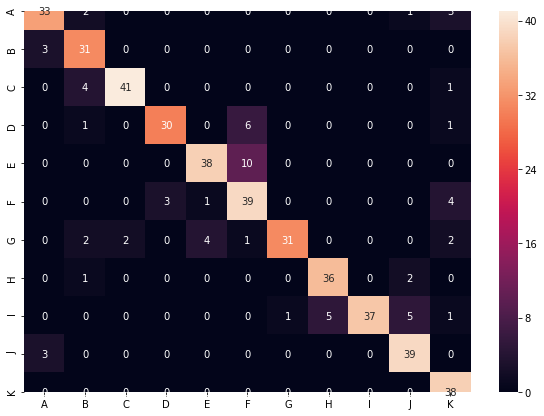

In [16]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[33,2,0,0,0,0,0,0,0,1,3], 
        [3,31,0,0,0,0,0,0,0,0,0], 
        [0,4,41,0,0,0,0,0,0,0,1], 
        [0,1,0,30,0,6,0,0,0,0,1], 
        [0,0,0,0,38,10,0,0,0,0,0], 
        [0,0,0,3,1,39,0,0,0,0,4], 
        [0,2,2,0,4,1,31,0,0,0,2],
        [0,1,0,0,0,0,0,36,0,2,0], 
        [0,0,0,0,0,0,1,5,37,5,1], 
        [3,0,0,0,0,0,0,0,0,39,0], 
        [0,0,0,0,0,0,0,0,0,0,38]]
df_cm = pd.DataFrame(array, index = [i for i in "ABCDEFGHIJK"],
                  columns = [i for i in "ABCDEFGHIJK"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)